#### 39/43

In [3]:
## written portion ##

Write down any 3 time series models that can be used for forecasting. (3 points)

ARIMA – Autoregressive Integrated Moving Average 
MA – Moving Average Models
AR - Autoregression Models

What are some real-world applications of time series forecasting? Name two. (2 points)

Businesses use sales data from previous sales over time to predict future sales

Weather data , previous temperatures, storm movements are used to forcast future weather.

What is the difference between a time series and a panel data set? (2 points)

Time series is one variable is one varbale observed over a certain time frame while panel data is multiple variables over a given time frame.

What is the major difference in how we select training sets in time series machine learning tasks compared to regression/classification tasks? (2 marks)

In time series training sets, the order matters. Chronological data is esential while in regression/classification tasks the time order shouldn't matter in the training set, the results shouldn't change because the data shouldn't vary over time.

Define the following terms as relates to time series models:

Stationarity (1 point)
When a time series of data has no long-term predictable patterns

Differencing (1 point)
stabilizing the variance of non stationary data. This operation calculates the change between error terms over consecutive time points.

what is White noise? (1 point)
When a series of data are distributed the same with a constant variance and mean of 0.

Random Walk (1 point)
An attempt to model time series data by creating random "steps" or jumps in the data over time as a way to predict changes over different intervals.

(5 points)
This is a generalized ARMA model The intercepts are as followed:
c is the constant
Epsilon Is the white noise
the Phi Is the coefficient for the auto-regression polynomial AR(1),AR(2),AR(3)
Theta is the coefficient for the moving average polynomial MA(1), MA(2), MA(3), MA(4)
Epsilon_t - 1 is the step or lags in the model for the MA portion of the ARMA.

Can you tell from the above equation whether the time series has been differenced?
Explain why or why not. (1 point)

From the Epsilon_t - 1 it looks like the time series has been differenced. I don't know how you could provide lags or an order if the time series were not differenced.

What is the Autoregressive (AR) order in the above equation? How about the Moving
Average (MA) order (2 points)

The AR order is AR(3),AR(2),AR(2), from the number above the summation (3) and t-1 denotion.
The MA order MA(4), MA(3), MA(2), MA(1) from the number above the summation (4) and t-1 denotion.

How do you determine the AR and MA order? How do you know how many lags to
include in your model? (2 points)

You determine the AR and MA order from the ACF and PACF plots of the differenced time series data. You look at the plots and chose the first significant bar, and any subsequent bar that's significant until a bar becomes insignificant.














#### You can not tell from that equation whether it has been differenced or not.(-1)

#### Be specific about which plot is used to determine the AR and MA order

In [4]:
import pandas as pd # v 1.5.3
import numpy as np # v 1.21.5
import statsmodels.api as sm # v 0.13.5
import pmdarima as pm #

import matplotlib.pyplot as plt # 3.6.3

import warnings as ww
import statsmodels.tsa.stattools as stattools  # v 0.13.5

from statsmodels.tsa.stattools import adfuller # v 0.13.5
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # v 0.13.5
from statsmodels.tsa.arima_model import ARIMA # v 0.13.5

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [5]:
df = pd.read_csv(r"C:\Users\rodge\OneDrive\Desktop\Data 300 GitHub\DATA-300-Statistical-Machine-Learning-Fall-2023-\Data\Electric_Production.csv")

In [6]:
# df = pd.read_csv('/Users/samcampbell/Downloads/Electric_Production.csv')

In [7]:
### Below is some exploratory analysis ###

In [8]:
df.shape, df.columns, df.dtypes

## It looks like the date variable is an object, so I'll have to turn it into date type ##

((397, 2),
 Index(['DATE', 'IPG2211A2N'], dtype='object'),
 DATE           object
 IPG2211A2N    float64
 dtype: object)

In [9]:
df.head(),df.tail()

(       DATE  IPG2211A2N
 0  1/1/1985     72.5052
 1  2/1/1985     70.6720
 2  3/1/1985     62.4502
 3  4/1/1985     57.4714
 4  5/1/1985     55.3151,
           DATE  IPG2211A2N
 392   9/1/2017     98.6154
 393  10/1/2017     93.6137
 394  11/1/2017     97.3359
 395  12/1/2017    114.7212
 396   1/1/2018    129.4048)

In [10]:
df.isna().sum() 

DATE          0
IPG2211A2N    0
dtype: int64

In [11]:
df.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [12]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [13]:
df.dtypes # changed date from an object to datetime

DATE          datetime64[ns]
IPG2211A2N           float64
dtype: object

In [14]:
df = df.sort_values('DATE') ## Sorting the values by date

In [15]:
df.head(),df.tail()

(        DATE  IPG2211A2N
 0 1985-01-01     72.5052
 1 1985-02-01     70.6720
 2 1985-03-01     62.4502
 3 1985-04-01     57.4714
 4 1985-05-01     55.3151,
           DATE  IPG2211A2N
 392 2017-09-01     98.6154
 393 2017-10-01     93.6137
 394 2017-11-01     97.3359
 395 2017-12-01    114.7212
 396 2018-01-01    129.4048)

In [16]:
## besides the data type for DATE not a lot stood out from my EDA, there aren't missing vals
## or anything that jumped out at me like that.

In [17]:
adf_test = sm.tsa.stattools.adfuller(df['IPG2211A2N'])

print('The p-value of the Dickey-Fuller test is:', adf_test[1])

print('The test statistic of the Dickey-Fuller test is:', adf_test[0])

kpss = stattools.kpss(df['IPG2211A2N'], regression='ct')

print('The p-value of the KPSS test is:', kpss[1])

print('The test statistic of the KPSS test is:', kpss[0])


### The p-values and test statistics from our Dickey Fuller and KPSS tests indicate that our -
### data is in fact non stationary so we need to difference it.


The p-value of the Dickey-Fuller test is: 0.1862146911658673
The test statistic of the Dickey-Fuller test is: -2.256990350047246
The p-value of the KPSS test is: 0.01
The test statistic of the KPSS test is: 0.5051030832418918


c:\Users\rodge\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


#### Your code is breaking below (-3)

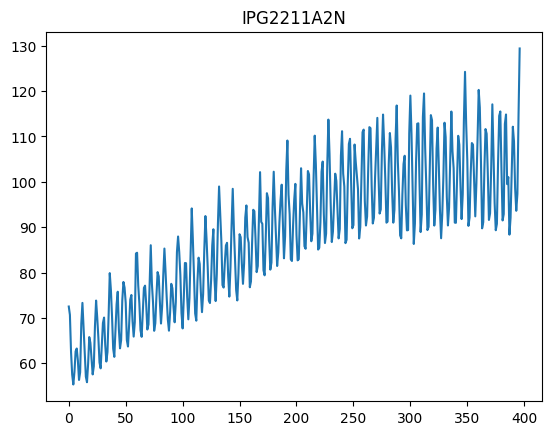

In [19]:
# undifferenced
#df["IPG2211A2N"].plot(fig=plt.figure(i))
df["IPG2211A2N"].plot()
plt.title("IPG2211A2N")
plt.show() 

# The variance looks fairly high and the distribution looks skewed. This makes sense since-
# our data is not stationary and this is the undifferenced plot.

In [ ]:
#differenced once
df["IPG2211A2N"].diff().plot(fig=plt.figure(i))
plt.title("IPG2211A2N")
plt.show() 

# The variance and distribution look as if they will be tighter and more normal once-
# differenced, as expected.

In [ ]:
# differenced twice
df["IPG2211A2N"].diff().diff().plot(fig=plt.figure(i))
plt.title("IPG2211A2N")
plt.show() 

# Honestly this doesn't look much different than when I differenced the data once.

In [20]:
## Here is a function for the ACF and PACF Plots ##
def acf_pacf (series)-> plt.plot:
    return plot_acf(series), plot_pacf(series)

c:\Users\rodge\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 1 Axes>)

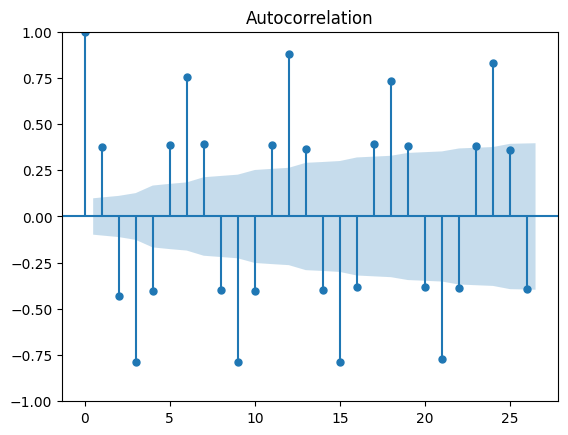

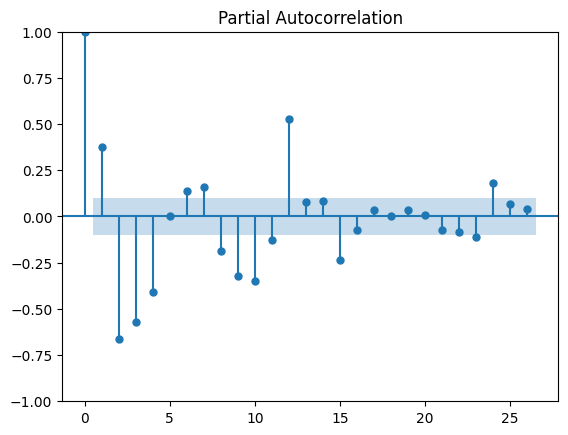

In [21]:
## I'm differencing my data for the plots here ##
acf_pacf(df['IPG2211A2N'].diff().tail(len(df)-1))
    


In [ ]:
## After running these plots and differencing the data it looks like the order for the ARMA/ARIMA
## woukld be (4,1,24)

#### Very well done on the PACF AND ACF

In [22]:
df['IPG2211A2N'] = df['IPG2211A2N'].diff() ## diferencing the data for the model ##

In [23]:
model = sm.tsa.arima.ARIMA(df['IPG2211A2N'].head(int(0.7*len(df))), order=(4, 1, 24))
results = model.fit()

c:\Users\rodge\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\rodge\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             IPG2211A2N   No. Observations:                  277
Model:                ARIMA(4, 1, 24)   Log Likelihood                -645.334
Date:                Fri, 06 Oct 2023   AIC                           1348.668
Time:                        10:03:29   BIC                           1453.660
Sample:                             0   HQIC                          1390.800
                                - 277                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6776      0.041    -16.508      0.000      -0.758      -0.597
ar.L2         -0.2488      0.023    -10.883      0.000      -0.294      -0.204
ar.L3         -0.7473      0.022    -34.544      0.000      -0.790      -0.705
ar.L4         -0.9230      0.039    -23.582      0.000      -1.000      -0.846
ma.L1         -0.5467      0.079     -6.923      0.000      -0.701      -0.392
ma.L2         -0.6240      0.092     -6.793      0.000      -0.804      -0.444
ma.L3          0.7478      0.095      7.833      0.000       0.561       0.935
ma.L4          0.0986      0.099      0.992      0.321      -0.096       0.293
ma.L5         -1.2572      0.103    -12.189      0.000      -1.459      -1.055
ma.L6          0.2070      0.108      1.909      0.056      -0.005       0.419
ma.L7          0.2130      0.124      1.717      0.086      -0.030       0.456
ma.L8         -0.1173      0.125     -0.939      0.348      -0.362       0.127
ma.L9          0.1307      0.109      1.194      0.232      -0.084       0.345
ma.L10         0.1200      0.131      0.915      0.360      -0.137       0.377
ma.L11        -0.0717      0.104     -0.690      0.490      -0.275       0.132
ma.L12         0.5567      0.125      4.465      0.000       0.312       0.801
ma.L13        -0.0639      0.116     -0.549      0.583      -0.292       0.164
ma.L14        -0.4536      0.109     -4.150      0.000      -0.668      -0.239
ma.L15         0.2477      0.127      1.947      0.052      -0.002       0.497
ma.L16         0.2938      0.104      2.834      0.005       0.091       0.497
ma.L17        -0.5319      0.112     -4.751      0.000      -0.751      -0.313
ma.L18        -0.2343      0.119     -1.973      0.049      -0.467      -0.002
ma.L19         0.2714      0.121      2.242      0.025       0.034       0.509
ma.L20         0.0420      0.104      0.405      0.685      -0.161       0.245
ma.L21        -0.3238      0.103     -3.152      0.002      -0.525      -0.122
ma.L22         0.0876      0.101      0.869      0.385      -0.110       0.285
ma.L23         0.1080      0.087      1.235      0.217      -0.063       0.279
ma.L24         0.1612      0.077      2.099      0.036       0.011       0.312
sigma2         5.1300      0.537      9.552      0.000       4.077       6.183
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):                 6.59
Prob(Q):                              0.40   Prob(JB):                         0.04
Heteroskedasticity (H):               1.61   Skew:                            -0.04
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
df['IPG2211A2N_forecast']=results.predict(start = int(0.7*len(df))+1, end=len(df) , dynamic=True)


c:\Users\rodge\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot: >

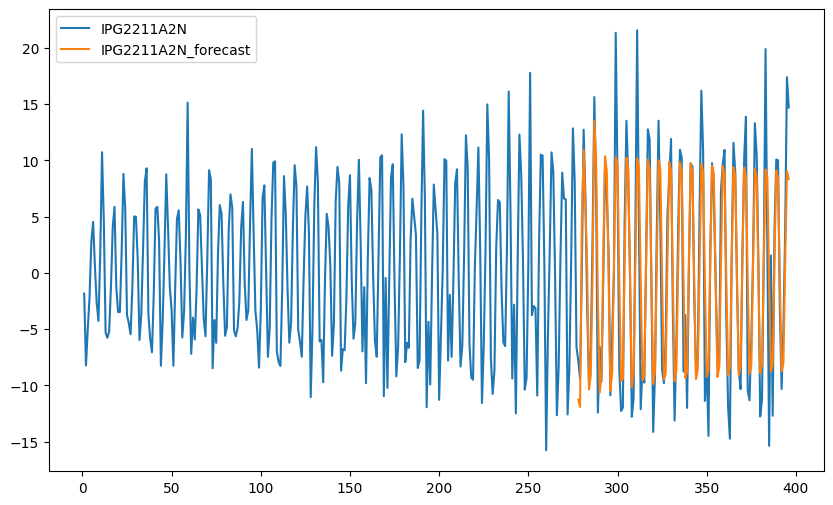

In [26]:
df[['IPG2211A2N','IPG2211A2N_forecast']].plot(figsize=(10,6))


In [ ]:
mean_absolute_error(df['IPG2211A2N_forecast'].tail(int(0.3*len(df))),df['IPG2211A2N'].tail(int(0.3*len(df))))


In [ ]:
mean_squared_error(df['IPG2211A2N_forecast'].tail(int(0.3*len(df))),df['IPG2211A2N'].tail(int(0.3*len(df))))


In [ ]:
## It's hard to interepet the mean errors for time series data like this relative to a universal-
## rule, but going off of the chart of the predicted and original data, the fit looks pretty good.
## some of the larger swings aren't accounted for so maybe differencing the data twice could help.